# Loading the Data

In [1]:
# load data



# import the experiment utilities package
import exputils as eu
import numpy as np


# create an experiment data loader, by default it will load data from '../experiments'
experiment_data_loader = eu.gui.jupyter.ExperimentDataLoaderWidget()


display(experiment_data_loader)
experiment_data_loader.load_data()

ExperimentDataLoaderWidget(children=(Box(children=(Button(description='Update Descriptions', layout=Layout(hei…

Output()

# Plotting the Data

In [2]:
# experiment data selection plotter that takes as input the data loader to plot its loaded data
experiment_data_plotter = eu.gui.jupyter.ExperimentDataPlotSelectionWidget(experiment_data_loader)
display(experiment_data_plotter)

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/traitlets/traitlets.py:1387: DeprecationWarning: Passing unrecognized arguments to super(CodeProducerWidget).__init__(cildren=[]).
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


ExperimentDataPlotSelectionWidget(children=(HBox(children=(Label(value='Data Sources:', layout=Layout(min_widt…

Output()

# Test Loss

In [5]:
# Plotting of ['test_loss'] 
import exputils as eu
from exputils.gui.jupyter.plotly_meanstd_scatter import plotly_meanstd_scatter

plot_config = eu.AttrDict(
layout = dict(
    xaxis = dict(
        title = '', 
        range = [None, None]),
    yaxis = dict(
        title = '', 
        range = [None, None]),
),
moving_average = dict(
    n = 1
),
data_filter = dict(
    every_nth_step = dict(
        step = 1,
        include_final_step = False
    ),
),        
default_group_label = 'rep <group_idx>')

selection_widget = eu.gui.jupyter.ExperimentDataPlotSelectionWidget(
    experiment_data_loader,
    datasources=['test_loss'],
    experiment_ids='all',
    repetition_ids='all',
    output_format=('S', 'E', 'D'),
    data_filter='',
    plot_function=plotly_meanstd_scatter,
    plot_function_config=plot_config,
    state_backup_name='state_backup_127577033',
    state_backup_variable_filter=['experiment_ids', 'repetition_ids'],  # only save these variables as backup
    is_datasources_selection=False,
    is_output_format_selection=False,
    is_data_filter_selection=False,
    is_plot_function_selection=False,
    is_plot_function_config_editor=False,
    is_code_producer=False) 
display(selection_widget)
selection_widget.plot_data()

ExperimentDataPlotSelectionWidget(children=(HBox(children=(Label(value='Experiments:', layout=Layout(min_width…

Output()

In [3]:
## plot the overall mean performance of 

import plotly.graph_objects as go
import matplotlib.colors as mcolors
import plotly.offline as pyo
import random

random.seed(6)

num_methods = 27

experiment_data = experiment_data_loader.experiment_data

method_results = {}
method_name = {}

method_durations = {}
method_params = {}


chunks = []
chunk_name = []


for key, val in experiment_data.items():  
    
    method_results[key] = []
    method_name[key] = experiment_data_loader.experiment_descriptions[key].name
    
    method_durations[key] = []
    method_params[key] = []
    
    for repetition_id, repetition_data in val['repetition_data'].items():
        epochs = repetition_data['epoch']
        
        val_loss = repetition_data['val_loss']
        test_loss = repetition_data['test_loss']

        min_val_idx = val_loss.argmin()
        min_val_test_loss = test_loss[min_val_idx]
                
        method_results[key].append(min_val_test_loss)
        method_durations[key].append(repetition_data['duration'])
        
        if 'params' in repetition_data:
            num_params = repetition_data['params']
        else:
            num_params = 0
        method_params[key].append(num_params)
        

    
# Extracting keys and values for the bar chart
categories = list(method_results.keys())
values = list(method_results.values())

### use average value:
values = [np.asarray(value).mean() for value in values]
### get names:å
categories = [method_name[key] for key in categories]
# Getting a list of named colors from matplotlib
named_colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(named_colors)
# Selecting the first 27 colors
colors = named_colors[:num_methods]

for frequency_chunk in range(4):
    
    chunk_values = values[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]
    chunk_names = categories[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]

    # Creating the bar chart
    fig = go.Figure(data=[go.Bar(x=chunk_names, y=chunk_values,marker_color=colors)])

    # Adding title and labels (you can modify these as needed)
    fig.update_layout(
        title=f"Method Performance for Frequency: {2**frequency_chunk}",
        xaxis_title="Methods",
        yaxis_title="Min Val Test Loss"
    )

    # Displaying the figure
    fig.show()
    
    chunks.append(chunk_values)
    chunk_name.append(f"{2**frequency_chunk}")
    


# transpose!
chunks = list(map(list, zip(*chunks)))
    

# Create a trace for each line
traces = [go.Scatter(x=list(range(len(line))), y=line, mode='lines', name=chunk_names[i][2:]) for i, line in enumerate(chunks)]

# Define the layout of the chart
layout = go.Layout(
    title='Multiple Lines Chart',
    xaxis=dict(title='Frequency', tickvals=list(range(len(chunk_name))), ticktext=chunk_name),
    yaxis=dict(title='Loss',type='log')
)

# Create the figure and plot it
fig = go.Figure(data=traces, layout=layout)
fig.show() 


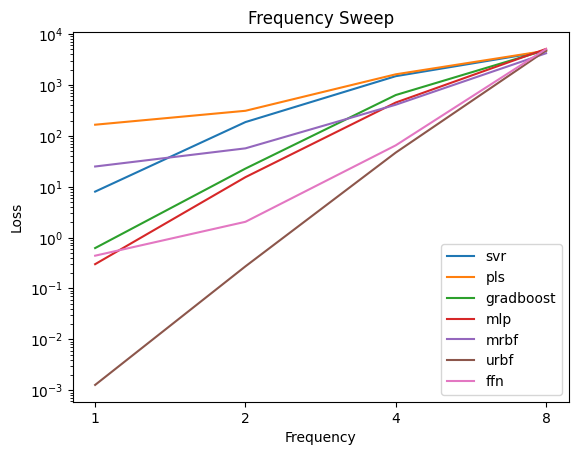

In [5]:
import matplotlib.pyplot as plt


top_method_renaming = {"svr":"svr","pls":"pls","gradboost":"gradboost", "mlp_001":"mlp","mrbf_001":"mrbf","urbf_001":"urbf","ffn_001_1":"ffn"}
top_methods = list(top_method_renaming.keys())


# Create a figure and an axis
fig, ax = plt.subplots()

# Plot each line
for i, line in enumerate(chunks):
    if chunk_names[i][2:] in top_methods:
        ax.plot(list(range(len(line))), line, label=top_method_renaming[chunk_names[i][2:]])

# Setting the title and labels
ax.set_title('Frequency Sweep')
ax.set_xlabel('Frequency')
ax.set_ylabel('Loss')

# Use logarithmic scale for y-axis
ax.set_yscale('log')

frequency_labels = [1,2,4,8]

# Setting x-axis ticks
ax.set_xticks(list(range(len(frequency_labels))))
ax.set_xticklabels(frequency_labels)

# Adding a legend
ax.legend()

# Show the plot
plt.show()

In [7]:
values = list(method_durations.values())
### use average value:
values = [np.asarray(value).mean() for value in values]

for frequency_chunk in range(4):
    
    chunk_values = values[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]
    chunk_names = categories[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]

    # Creating the bar chart
    fig = go.Figure(data=[go.Bar(x=chunk_names, y=chunk_values,marker_color=colors)])

    # Adding title and labels (you can modify these as needed)
    fig.update_layout(
        title=f"Method Duration for Frequency: {2**frequency_chunk}",
        xaxis_title="Methods",
        yaxis_title="Duration"
    )

    # Displaying the figure
    fig.show()
    
   
    
    


In [8]:
values = list(method_params.values())
### use average value:
values = [np.asarray(value).mean() for value in values]

for frequency_chunk in range(4):
    
    chunk_values = values[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]
    chunk_names = categories[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]

    # Creating the bar chart
    fig = go.Figure(data=[go.Bar(x=chunk_names, y=chunk_values,marker_color=colors)])

    # Adding title and labels (you can modify these as needed)
    fig.update_layout(
        title=f"Method Params for Frequency: {2**frequency_chunk}",
        xaxis_title="Methods",
        yaxis_title="Duration"
    )

    # Displaying the figure
    fig.show()